# Treemap of Newcomer Edit Types

Let's explore visualizing edit types with a treemap!

In [6]:
library(treemapify)
library(ggplot2)

library(tidyverse)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
# Example data from the introduction: https://r-charts.com/part-whole/treemapify/

group <- paste("Group", 1:9)
subgroup <- c("A", "C", "B", "A", "A",
              "C", "C", "B", "B")
value <- c(7, 25, 50, 5, 16,
           18, 30, 12, 41)

df <- data.frame(group, subgroup, value) 

In [122]:
## Our data from the other notebook

edit_type_data <- tribble(
    ~first_edit_group, ~first_edit_subgroup, ~second_edit_group, ~second_edit_subgroup, ~n_editors, ~group_label,
    'NT', 'Add Link', 'Yes', 'None', 85, 'None\n85\n(34.6%)',
    'NT', 'Add Link', 'Yes', 'Only', 69, 'Only\n69\n(28.0%)',
    'NT', 'Add Link', 'Yes', 'Both', 92, 'Both\n92\n(37.4%)',
    'NT', 'Add Link', 'No', '', 738, 'No 2nd session\n738\n(75.0%)',
    'NT', 'Other task', 'Yes', 'None', 106, 'None\n106\n(44.7%)',
    'NT', 'Other task', 'Yes', 'Only', 44, 'Only\n44\n(18.6%)',
    'NT', 'Other task', 'Yes', 'Both', 87, 'Both\n87\n(36.7%)',
    'NT', 'Other task', 'No', '', 684, 'No 2nd session\n684\n(74.3%)',
    'Other', 'Not ', 'Yes', '-', 412, 'Edited again\n4,118\n(23.5%)',
    'Other', '', 'No', '-', 1342, 'No 2nd session\n13,416\n(76.5%)'
)

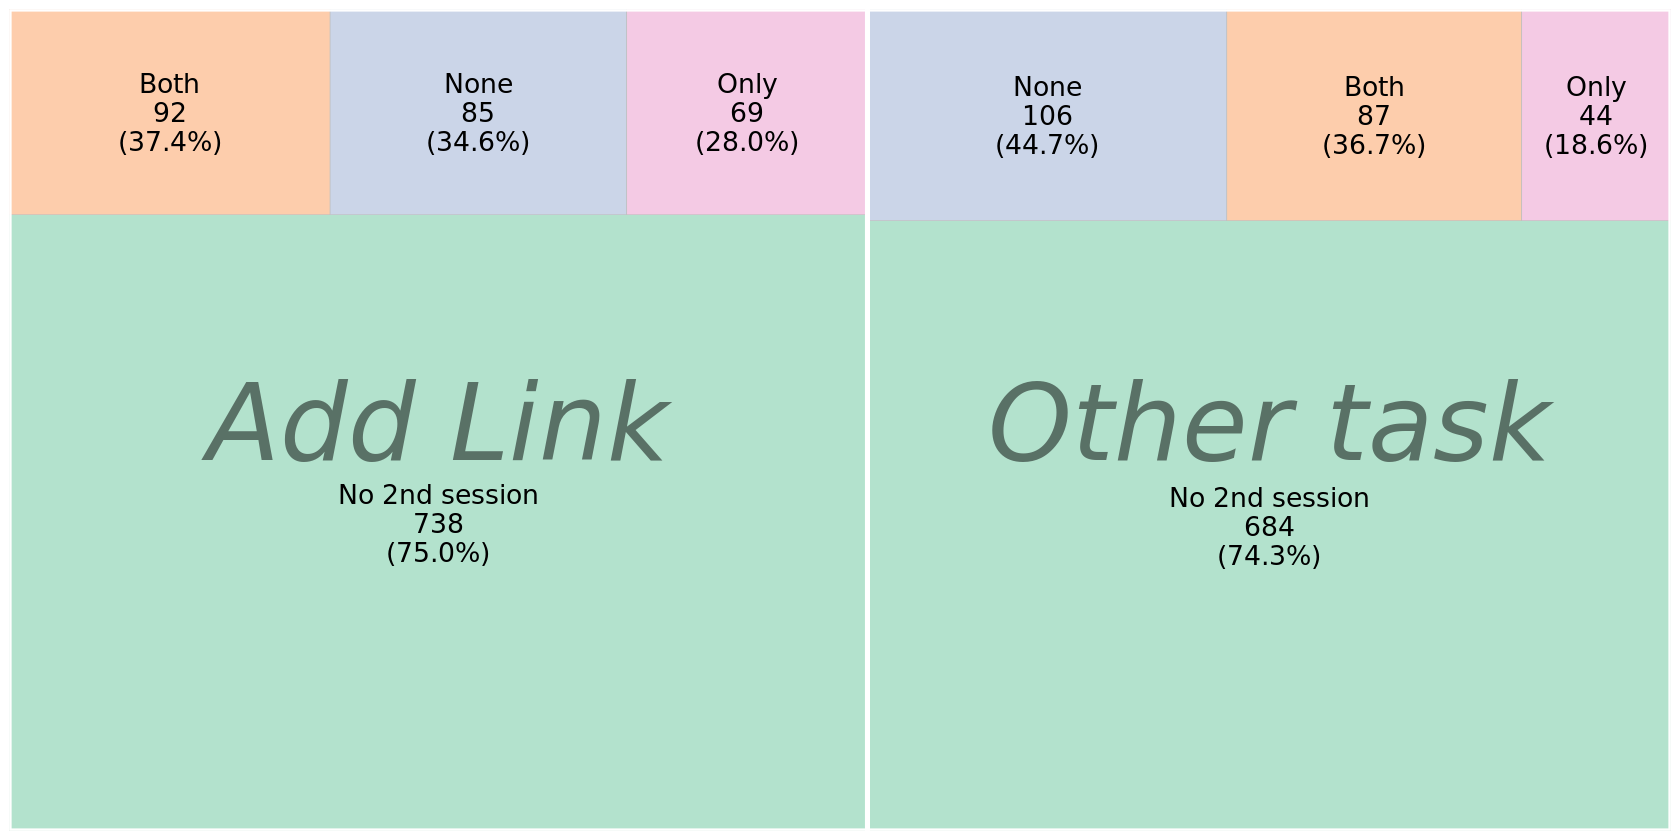

In [126]:
# Give me wider plots, please
options(repr.plot.width = 14, repr.plot.height = 7)
edit_type_data %>%
    filter(first_edit_group == 'NT') %>%
    ggplot(aes(area = n_editors, fill = second_edit_subgroup,
                           label = group_label,
                           subgroup = first_edit_subgroup)) +
    geom_treemap() +
    geom_treemap_subgroup_border(colour = "white", size = 4) +
    geom_treemap_subgroup_text(place = "centre", size = 64, grow = FALSE,
                             colour = "black", alpha = 0.5,
                             fontface = "italic") +
    geom_treemap_text(colour = "black", place = "centre",
                    size = 16, grow = FALSE) +
    scale_fill_brewer(type = 'qual', palette = 'Pastel2') +
    theme(legend.position = "none")

In [119]:
ggsave(
    'newcomer-tasks-edit-types-april-2022.png',
    path = 'graphs',
    width = 14, height = 7, units = "in", dpi = "screen")